# Interpolação Polinomial (em construção)

Neste bloco da disciplina veremos como construir um polinômio que passe por $n$ pontos de uma função desconhecida ou cara de se calcular. A ideia é *interpolar* os valores da função entre dois pontos. 

**Q:** Qual vai ser o grau deste polinômio?

Primeiro, vamos visualizar o que queremos fazer [neste applet](http://math.mercyhurst.edu/~lwilliams/Applets/Interpolation.html).

## Exemplos de aplicações
*Fonte: [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation)*

* Aproximação de curvas complicadas (p.ex., tipografia)
* Cálculo rápido de aproximações para logaritmo natural e funções trigonométricas
* Base para integração numérica e equações diferenciais ordinárias numéricas
* Multiplicação e elevação ao quadrado de números com custo sub-quadrático no número de dígitos
* Esquemas relacionados a criptografia

### Exansão de Taylor do logaritmo natural

Para qualquer $0 < x < 2$, com $x \in \mathbb{R}$:

$$
\ln(x) = (x-1) - \frac{1}{2}(x-1)^2 + \frac{1}{3}(x-1)^3 - \ldots = \sum_{=1}^\infty \left[ \frac{(-1)^{n+1}}{n} (x-1)^{n} \right]
$$

Vamos calcular o tempo para obter uma aproximação com erro $|\epsilon| < 10^{-10}$ para 100k pontos em $x \in (0,2)$.

CONTINUAR AQUI.

## Como fazíamos no ensino médio?

### Interpolação Linear (grau 1)
**Exemplo 1:** Construa o polinômio interpolador de grau 1 a partir dos pontos $(x_0,y_0)$, $(x_1, y_1)$.

In [69]:
import numpy as np

data = np.array([[0.1,1.221],[0.6,3.320]])

n = data.shape[0]
X = np.array([np.ones(n),data[:,0]]).T
print(X)
y = data[:,1]

a_lin = np.linalg.solve(X,y)
print(a_lin)

[[ 1.   0.1]
 [ 1.   0.6]]
[ 0.8012  4.198 ]


In [70]:
p1 = np.dot(np.array([1,0.2]),a_lin)
p2 = np.dot(np.array([1,0.3]),a_lin)
print(p1,p2)

(1.6408, 2.0606)


### Interpolação Quadrática (grau 2)
**Exemplo 2:** Construa o polinômio interpolador de grau 2 a partir dos pontos $(x_0,y_0)$, $(x_1, y_1)$, $(x_2,y_2)$.

In [71]:
data = np.array([[0.1,1.221],[0.6,3.320],[0.8,4.953]])

n = data.shape[0]
X = np.array([np.ones(n),data[:,0],data[:,0]**2]).T
print(X)
y = data[:,1]

a_quad = np.linalg.solve(X,y)
print(a_quad)

[[ 1.    0.1   0.01]
 [ 1.    0.6   0.36]
 [ 1.    0.8   0.64]]
[ 1.14122857  0.231       5.66714286]


In [73]:
q1 = np.dot(np.array([1,0.2,0.2**2]),a_quad)
q2 = np.dot(np.array([1,0.3,0.3**2]),a_quad)
print(q1,q2)

(1.4141142857142859, 1.7205714285714291)


In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,1)
n = len(x)

f = np.exp(2*x)
p_lin = np.array([np.ones(n),x]).T.dot(a_lin.T)
p_quad = np.array([np.ones(n),x,x**2]).T.dot(a_quad.T)

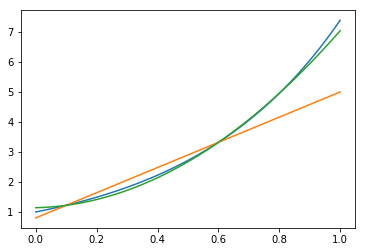

In [86]:
fig, ax = plt.subplots(1,1)
plt.plot(x,f)
#plt.plot(x,p_lin)
#plt.plot(x,p_quad)